In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [3]:
dataset = pd.read_csv("SCLC_study_output_filtered.csv")

In [4]:
dataset.head()

,Unnamed: 0,186,295,321,337,464,469,502,506,563,...,1401,1402,1414,1422,1524,1551,1553,1559,1561,1568
0,NSCLC_A549_1,171210.5829,1246686.524,527193.4870,411155.8781,59929.70461,49255.07973,171273.1364,159183.1286,663694.9741,...,95049.95991,1.719464e+06,645473.1920,89954.00002,52983.82193,1.672322e+06,6.867305e+05,259889.4715,1.563879e+06,189971.51110
1,NSCLC_H1703_2,204751.3591,1338013.461,571379.0841,486137.0920,89261.66256,72052.72202,187464.2389,180000.6140,443440.3745,...,131002.12740,8.290090e+05,293504.7109,42264.73772,97472.88420,1.608167e+06,9.408252e+05,363398.5823,3.043114e+05,35762.79339
2,NSCLC_H1703_1,203558.4952,1040438.105,498460.6875,411052.8868,96002.36973,0.00000,193894.4078,179518.9387,736672.9068,...,108827.84800,8.541730e+05,313811.6234,51125.12753,95633.56928,1.931491e+06,1.086556e+06,417606.0810,4.365568e+05,53865.65208
3,NSCLC_A549_2,245859.2006,1371135.588,153050.9373,495539.7034,81436.65785,85158.56741,0.0000,186757.1440,809830.2341,...,106003.59820,2.037000e+06,762600.1361,116878.29910,58497.52991,2.077164e+06,8.461167e+05,328548.1739,1.824857e+06,243842.05260
4,NSCLC_H1437_1,214448.1780,1107105.986,524333.5670,484994.8797,92368.82235,69868.54980,181168.8533,0.0000,635990.2172,...,83218.09256,1.269266e+06,459612.8875,64837.50435,0.00000,9.434720e+05,4.022300e+05,153070.9443,3.745915e+05,44104.41364


In [8]:
dataset_new = dataset.drop("Unnamed: 0",axis = 1)

In [9]:
dataset_new

,186,295,321,337,464,469,502,506,563,931,...,1401,1402,1414,1422,1524,1551,1553,1559,1561,1568
0,171210.5829,1.246687e+06,527193.4870,411155.8781,59929.70461,49255.07973,171273.1364,159183.1286,663694.9741,35070.49713,...,95049.95991,1.719464e+06,6.454732e+05,89954.00002,52983.82193,1.672322e+06,6.867305e+05,259889.47150,1.563879e+06,189971.51110
1,204751.3591,1.338013e+06,571379.0841,486137.0920,89261.66256,72052.72202,187464.2389,180000.6140,443440.3745,89938.26439,...,131002.12740,8.290090e+05,2.935047e+05,42264.73772,97472.88420,1.608167e+06,9.408252e+05,363398.58230,3.043114e+05,35762.79339
2,203558.4952,1.040438e+06,498460.6875,411052.8868,96002.36973,0.00000,193894.4078,179518.9387,736672.9068,107041.34120,...,108827.84800,8.541730e+05,3.138116e+05,51125.12753,95633.56928,1.931491e+06,1.086556e+06,417606.08100,4.365568e+05,53865.65208
3,245859.2006,1.371136e+06,153050.9373,495539.7034,81436.65785,85158.56741,0.0000,186757.1440,809830.2341,43565.82607,...,106003.59820,2.037000e+06,7.626001e+05,116878.29910,58497.52991,2.077164e+06,8.461167e+05,328548.17390,1.824857e+06,243842.05260
4,214448.1780,1.107106e+06,524333.5670,484994.8797,92368.82235,69868.54980,181168.8533,0.0000,635990.2172,51087.42828,...,83218.09256,1.269266e+06,4.596129e+05,64837.50435,0.00000,9.434720e+05,4.022300e+05,153070.94430,3.745915e+05,44104.41364
5,183191.6157,1.174738e+06,492585.8915,449578.4386,79716.72953,75515.06063,183437.4307,160558.7349,276662.4819,0.00000,...,95778.02450,2.198629e+06,8.225157e+05,111458.22230,71137.63905,6.518409e+05,3.243276e+05,120577.90190,2.398504e+05,26049.74665
6,175265.4691,1.202537e+06,534477.6418,411424.5102,78543.10781,73022.58488,188280.2568,166795.8967,279301.0355,0.00000,...,80946.89867,2.151175e+06,8.019036e+05,111787.12740,73818.14014,9.835338e+05,4.109319e+05,158182.41980,4.805162e+05,81599.98032
7,209841.9595,1.227508e+06,557683.2820,439658.0081,85554.76639,53375.19676,180316.8659,162056.8933,480095.9724,39254.98810,...,74083.46712,1.273900e+06,4.746453e+05,61945.54567,30605.31487,1.056893e+06,4.377822e+05,169338.17170,4.483407e+05,47908.89141
8,193689.1190,8.970122e+05,429777.7038,376694.1029,58148.61391,70389.01583,176004.3086,158849.0344,293541.8231,11293.18377,...,60621.49012,7.625104e+05,2.742129e+05,0.00000,11919.22697,9.998002e+05,3.356711e+05,125139.13200,1.894311e+06,0.00000
9,182119.5458,9.764488e+05,397898.3481,408685.1330,89009.23679,74915.72330,194904.8565,181511.3540,304541.2244,47592.74145,...,77568.36857,1.694218e+06,6.329151e+05,82073.82128,49384.36621,8.424179e+05,2.581493e+05,101574.07720,1.193769e+06,64014.81829


In [35]:
total_var = 0
for i in dataset_new.columns:
    
    lista = dataset_new[i]
    total_var = total_var + np.var(lista)

In [13]:
total_var

3274592567846.942

In [43]:
def d_PCA(x, corr_logic):
    columnMean = x.mean(axis=0)
    columnMeanAll = np.tile(columnMean, reps=(x.shape[0], 1))
    xMeanCentered = x - columnMeanAll

    # use mean_centered data or standardized mean_centered data
    if not corr_logic:
        dataForPca = xMeanCentered
    else:
        dataForPca = x

    # get covariance matrix of the data
    covarianceMatrix = np.cov(dataForPca, rowvar=False)

    # eigendecomposition of the covariance matrix
    eigenValues, eigenVectors = LA.eig(covarianceMatrix)
    II = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[II]
    eigenVectors = eigenVectors[:, II]

    # get scores
    pcaScores = np.matmul(dataForPca, eigenVectors)

    # collect PCA results
    pcaResults = {'data': x,
                   'mean_centered_data': xMeanCentered,
                   'PC_variance': eigenValues,
                   'loadings': eigenVectors,
                   'scores': pcaScores}

    return pcaResults

In [59]:

pcaResults = d_PCA(dataset_new,False)

In [60]:
covPC1_PC2 = np.cov(pcaResults['loadings'][0],pcaResults['loadings'][1])

In [61]:
totalPcVar = 0
totalPcVar = np.sum(pcaResults['PC_variance'])
totalPcVar

(3358556479843.0205+8.4703294725430034e-22j)

    the total variance of the original variables and the totalvariance of the PCs are slightly different
    total_var =  3274592567846.942
    totalPcVar = 3358556479843.0205

    Covariance between PC1 and PC2

In [58]:
covPC1_PC2 = np.cov(pcaResults['loadings'][0],pcaResults['loadings'][1])
covPC1_PC2

array([[ 0.01974018+0.j, -0.00024062+0.j],
       [-0.00024062+0.j,  0.02035172+0.j]])

    Score plot

E:\KDD\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
E:\KDD\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


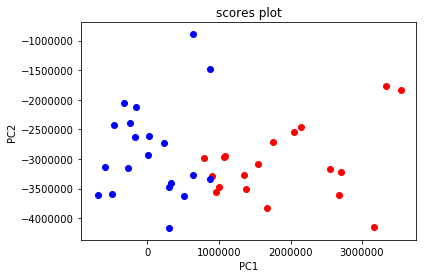

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scores plot')
ax.scatter(pcaResults['scores'][0:19,0], pcaResults['scores'][0:19,1], color='red')
ax.scatter(pcaResults['scores'][20:49,0], pcaResults['scores'][20:49,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.show()

In [64]:
percentVarianceExplained = 100 * (pcaResults['PC_variance'][0] / np.sum(pcaResults['PC_variance']))
print( "PC1 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC1 explains: (40.06-0j)% variance



In [65]:
percentVarianceExplained = 100 * (pcaResults['PC_variance'][1] / np.sum(pcaResults['PC_variance']))
print( "PC2 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC2 explains: (14.91-0j)% variance



In [66]:
percentVarianceExplained = 100 * (pcaResults['PC_variance'][2] / np.sum(pcaResults['PC_variance']))
print( "PC3 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC3 explains: (13-0j)% variance



In [67]:
percentVarianceExplained = 100 * (pcaResults['PC_variance'][4] / np.sum(pcaResults['PC_variance']))
print( "PC4 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC4 explains: (6.44-0j)% variance



In [68]:
percentVarianceExplained = 100 * (pcaResults['PC_variance'][5] / np.sum(pcaResults['PC_variance']))
print( "PC5 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')

PC5 explains: (3.81-0j)% variance



    We need 5 Pcs to explain 75% of the data

    Loadings plot

E:\KDD\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
E:\KDD\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


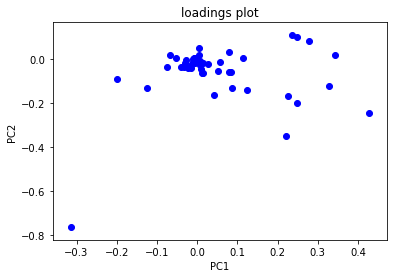

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('loadings plot')
ax.scatter(pcaResults['loadings'][:,0], pcaResults['loadings'][:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.show()

    Question part second

In [47]:
pcaPartTwo = d_PCA(dataset_new,True)

In [51]:
sumPCMeanCent = 0
for i in pcaPartTwo['PC_variance']:
    sumPCMeanCent = sumPCMeanCent + i;

In [53]:
sumPCMeanCent

(3358556479843.0229+0j)

    total_var =  3274592567846.942 before standardization
    sumPCMeanCent = 3358556479843.0229+0j after standardization
    They are slightly different